In [1]:
import os
import numpy as np
import pandas as pd
import csv
import tqdm
from vgg import get_cls,get_img_paths,svm_classify
from vgg import face_verification,is_match,generate_embeddings
from sklearn.metrics import DetCurveDisplay,det_curve
from sklearn.metrics import RocCurveDisplay,roc_curve
import matplotlib.pyplot as plt



label_path = './test_list.txt'
score_path = 'scores'
r_idx_path = 'identity_meta.csv'

# build class to name mapping
mapping = dict()
with open('identity_meta.csv','r',encoding='utf-8') as f:
    csvFile = csv.reader(f)
    for line in csvFile:
        mapping[line[0]]=line[1]

if not os.path.exists(score_path):
    os.makedirs(score_path)


    

In [2]:
def face_identification_eval():
    cls = get_cls()
    train_image_paths,test_image_paths,train_labels,test_gt_labels = get_img_paths(cls)
    test_pred_labels, test_pred_conf = svm_classify(train_image_paths,train_labels,test_image_paths)
    return test_gt_labels, test_pred_labels, test_pred_conf

# identification eval
test_gt , test_pred, pred_conf = face_identification_eval()


test\n000009\0115_01.jpg
1/1 [==============================] - 0s 19ms/step
test\n000009\0044_01.jpg
1/1 [==============================] - 0s 21ms/step
test\n000009\0239_01.jpg


d:\Python\lib\site-packages\mtcnn\mtcnn.py:206: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if method is 'Min':
d:\Python\lib\site-packages\mtcnn\mtcnn.py:206: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if method is 'Min':
d:\Python\lib\site-packages\mtcnn\mtcnn.py:206: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if method is 'Min':


KeyboardInterrupt: 

In [ ]:
tp = 0
fp = 0
for i,l in enumerate(test_gt):
    if test_pred[i]==test_gt[i]:
        tp+=1
    else:
        fp+=1
top_1_err = fp/len(test_gt)
fpr,fnr,_ = det_curve(test_gt,test_pred)
det = DetCurveDisplay(fpr=fpr,fnr=fnr,estimator_name='SVC')
det.plot()
plt.show()

In [5]:
def get_cls_veri():
    cls =[]
    for root,dirs,files in os.walk('./veri_test'):
        for d in dirs:
            cls.append(d)
    return cls

def face_identification_eval():
    cls = get_cls_veri()
    image_paths,labels = get_img_paths(cls,type='veri_test')
    y_true=[]
    y_sim=[]
    embeddings = generate_embeddings(image_paths)
    for i,p in enumerate(embeddings):
        for j in range(i,len(embeddings)):
            match,sim_score=is_match(embeddings[i],embeddings[j])
            if labels[i]==labels[j]:
                y_true.append(1)
            else:
                y_true.append(0)
            y_sim.append(sim_score)
    return y_true,y_sim
    
y_true,y_sim=face_identification_eval()

    
   
    

veri_test\ajw\ajw_1.jpg
1/1 [==============================] - 0s 18ms/step
veri_test\ajw\ajw_2.jpg
1/1 [==============================] - 0s 14ms/step
veri_test\ajw\ajw_3.jpg
1/1 [==============================] - 0s 19ms/step
veri_test\hhh\hhh_1.jpg
1/1 [==============================] - 0s 15ms/step
veri_test\hhh\hhh_2.jpg
1/1 [==============================] - 0s 15ms/step
veri_test\lzj\lzj_1.jpg
1/1 [==============================] - 0s 18ms/step
veri_test\lzj\lzj_2.jpg
1/1 [==============================] - 0s 15ms/step
veri_test\sharon\sharonstone_1.jpg
1/1 [==============================] - 0s 17ms/step
veri_test\sharon\sharonstone_2.jpg
1/1 [==============================] - 0s 16ms/step
veri_test\sharon\sharonstone_3.jpg
1/1 [==============================] - 0s 17ms/step
veri_test\wc\wc_1.jpg
1/1 [==============================] - 0s 19ms/step
veri_test\wc\wc_2.jpg
1/1 [==============================] - 1s 1s/step


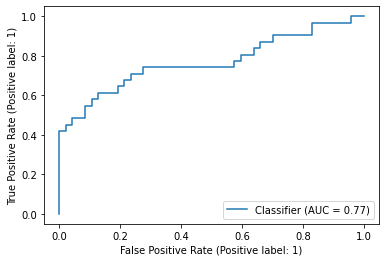

In [9]:
RocCurveDisplay.from_predictions(y_true,y_sim)